In [3]:
from sklearn.datasets import *
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Carga del Dataset

In [4]:
datos=pd.read_csv("Datos/datos")
d=pd.DataFrame(datos)
d.head()

,GRAVEDAD,PEATON,AUTOMOVIL,CAMPAERO,CAMIONETA,MICRO,BUSETA,BUS,CAMION,VOLQUETA,MOTO,BICICLETA,BARRIO,nombrecomuna,DIURNIO/NOCTURNO,NBARRIO,NCOMUNA
0,2,0,1,0,1,0,0,0,0,0,0,0,125,12,0,PORTON DEL TEJAR,Cabecera del Llano
1,2,0,1,0,0,0,0,0,0,0,0,0,134,6,0,RICAURTE,La Concordia
2,0,0,0,0,0,0,0,0,0,0,3,0,43,10,1,DIAMANTE II,Provenza
3,2,0,1,0,0,0,0,0,0,0,0,0,44,8,0,EL BUENO,Sur Occidente
4,0,0,0,0,0,0,0,0,0,0,2,0,40,12,1,CONUCOS,Cabecera del Llano


# Resumen del Dataset

In [5]:
summ=d.describe()
summ=summ.transpose()
summ.head(9)

,count,mean,std,min,25%,50%,75%,max
GRAVEDAD,3807.0,0.990018,0.994945,0.0,0.0,1.0,2.0,2.0
PEATON,3807.0,0.114263,0.340510,0.0,0.0,0.0,0.0,4.0
AUTOMOVIL,3807.0,0.759653,0.706750,0.0,0.0,1.0,1.0,4.0
CAMPAERO,3807.0,0.056212,0.234879,0.0,0.0,0.0,0.0,2.0
CAMIONETA,3807.0,0.193065,0.431637,0.0,0.0,0.0,0.0,3.0
MICRO,3807.0,0.018387,0.138220,0.0,0.0,0.0,0.0,2.0
BUSETA,3807.0,0.053060,0.234494,0.0,0.0,0.0,0.0,2.0
BUS,3807.0,0.045180,0.210240,0.0,0.0,0.0,0.0,2.0
CAMION,3807.0,0.079065,0.275655,0.0,0.0,0.0,0.0,2.0


# Correlación de los datos

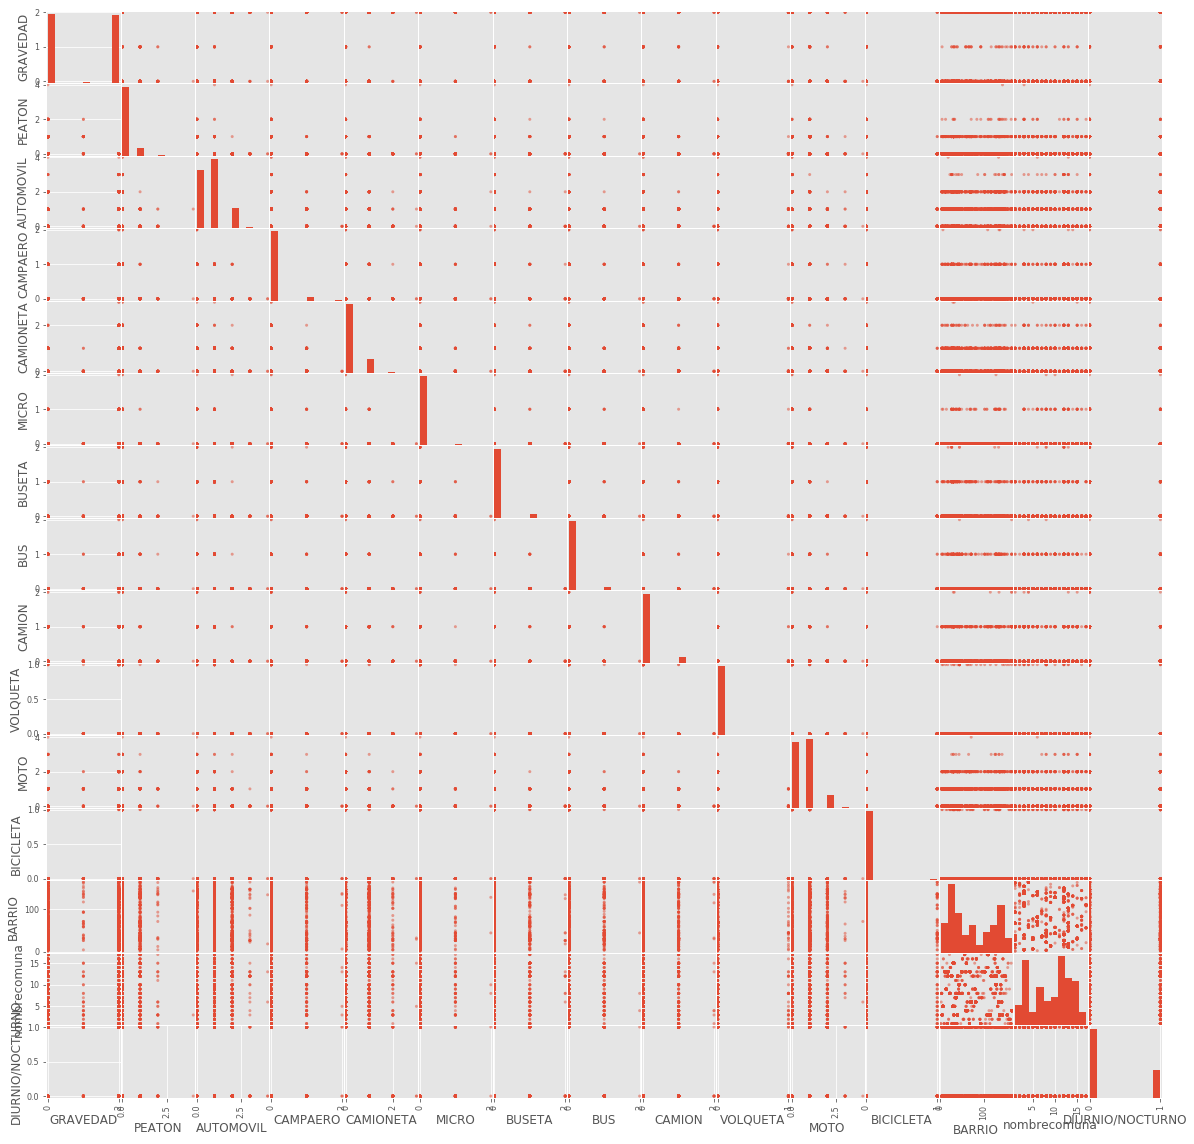

In [28]:
pd.plotting.scatter_matrix(d, figsize=(20,20));

# Análisis de datos

## Cuantificando la cantidad de accidentes por gravedad
Se clasifica la gravedad así: 
* El valor 0 CON HERIDOS
* El valor 1 CON MUERTOS
* El valor 2 SOLO DAÑOS

In [6]:
print (d.groupby('GRAVEDAD').size())

GRAVEDAD
0    1903
1      39
2    1865
dtype: int64


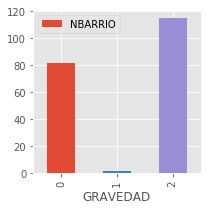

In [175]:
n=10 
r=d[(d.nombrecomuna>n-1) & (d.nombrecomuna<n+1)]
r.groupby('GRAVEDAD')['NBARRIO'].count().plot(kind='bar',figsize=(3,3),legend='Reverse')

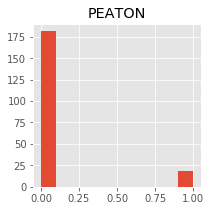

In [142]:
r.hist('PEATON',figsize=(3,3))
plt.show()

## ¿Cuáles son las comunas donde ocurren más accidentes?

In [137]:
d['NCOMUNA'].value_counts()

Cabecera del Llano    710
San Francisco         503
Oriental              499
Centro                424
La Concordia          302
Sur Occidente         251
Provenza              199
Occidental            178
Norte                 160
García Rovira         136
La Ciudadela          103
La Pedregosa           95
Mutis                  79
Lagos del Cacique      59
Nororiental            53
Morrorrico             43
Sur                    13
Name: NCOMUNA, dtype: int64

## Total accidentes por Comuna

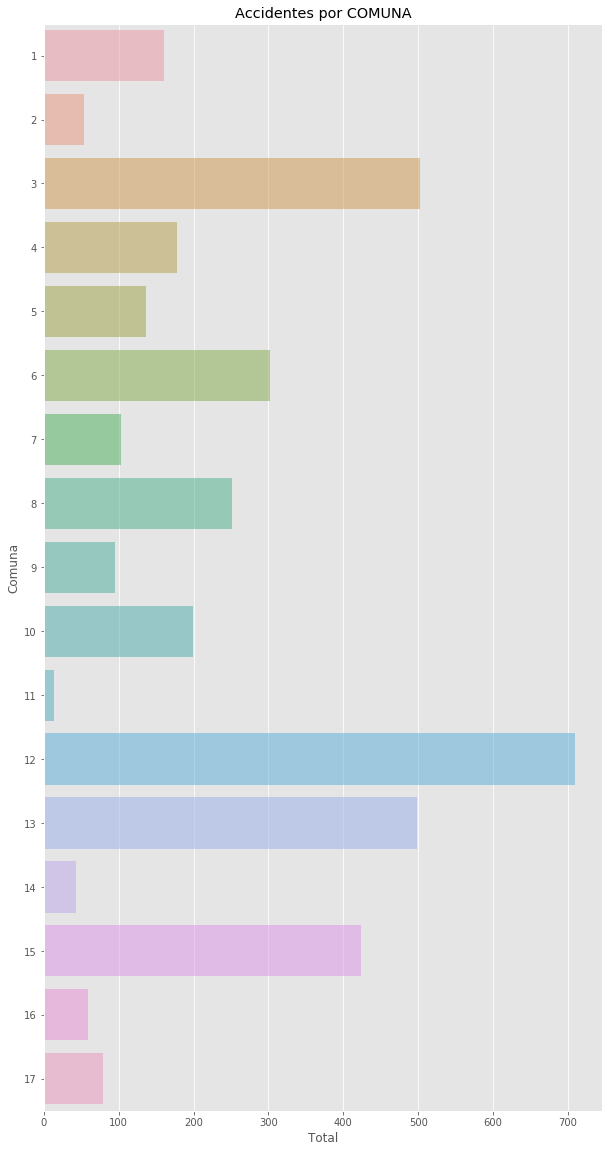

In [64]:
import seaborn as sns
alpha = 0.5
plt.figure(figsize=(10,20))
sns.countplot(y='nombrecomuna', data=d, alpha=alpha)
plt.title('Accidentes por COMUNA')
plt.ylabel('Comuna')
plt.xlabel('Total')
plt.show()

## Total Accidentes por Barrios

In [8]:
! pip install seaborn

You are using pip version 9.0.1, however version 19.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


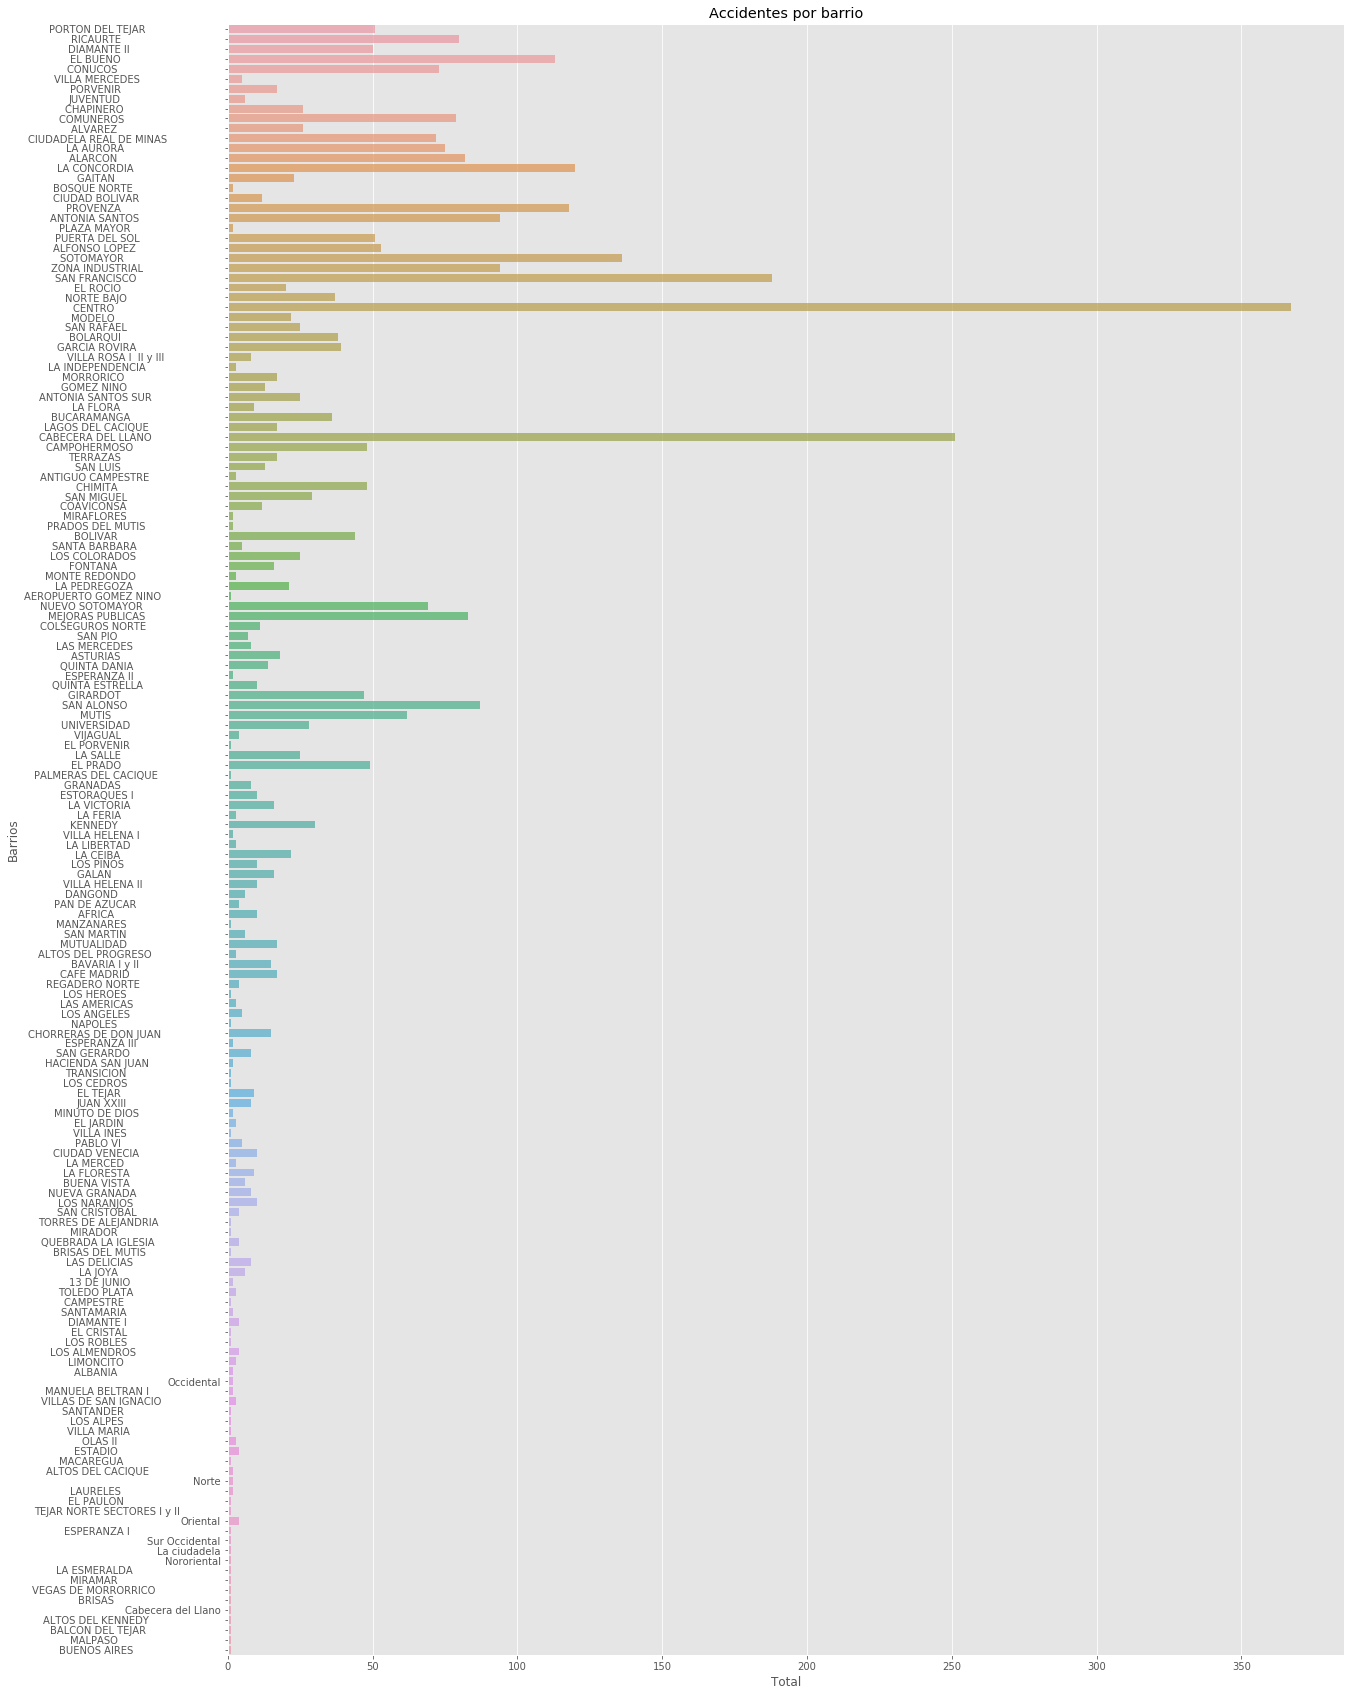

In [63]:
import seaborn as sns
alpha = 0.7
plt.figure(figsize=(20,30))
sns.countplot(y='NBARRIO', data=d, alpha=alpha)
plt.title('Accidentes por barrio')
plt.ylabel('Barrios')
plt.xlabel('Total')
plt.show()

## Accidentes por Jornada

#### DIURNIO/NOCTURNO
##### Si el accidente ocurrió durante un turno DIURNO el valor es 0
##### Si el accidente ocurrió durente un turno NOCTURNO el valor es 1

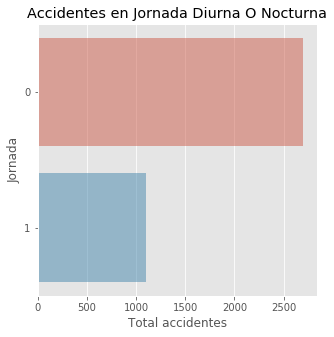

In [80]:
#Jornada en las que ocurren los accidentes
import seaborn as sns
alpha = 0.5
plt.figure(figsize=(5,5))
sns.countplot(y='DIURNIO/NOCTURNO', data=d, alpha=alpha)
plt.title('Accidentes en Jornada Diurna O Nocturna')
plt.ylabel('Jornada')
plt.xlabel('Total accidentes')
plt.show()

#### Accidentes por comuna

Text(0,0.5,u'Total accidentes')

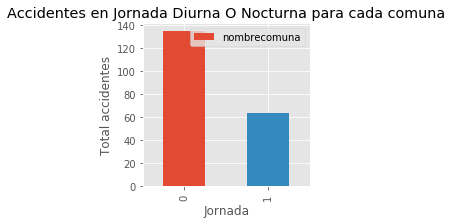

In [138]:
n2=10 
r1=d[(d.nombrecomuna>n2-1) & (d.nombrecomuna<n2+1)]
r1.groupby('DIURNIO/NOCTURNO')['nombrecomuna'].count().plot(kind='bar',figsize=(3,3),legend='Reverse')
plt.title('Accidentes en Jornada Diurna O Nocturna para cada comuna')
plt.xlabel('Jornada')
plt.ylabel('Total accidentes')

# Agrupación por método Kmeans

## Tasa de accidentalidad por vehículos involucrados

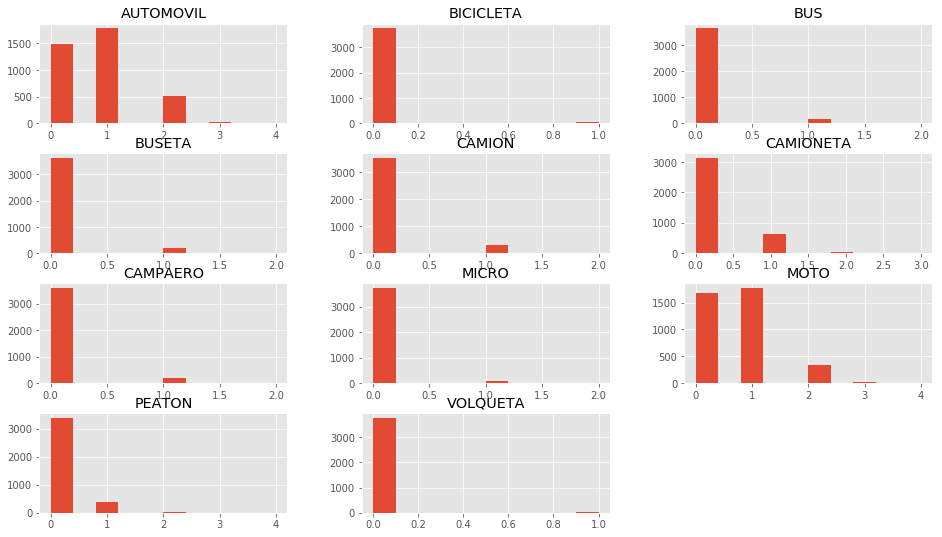

In [11]:
d.drop(['GRAVEDAD','BARRIO','DIURNIO/NOCTURNO','nombrecomuna'],1).hist()
plt.show()

## Definición de entradas

In [13]:
X=np.array(d[["PEATON","AUTOMOVIL","CAMIONETA","BICICLETA","BUS", "BUSETA", "CAMPAERO", "MICRO", "MOTO", "VOLQUETA","CAMION"]])
y=np.array(d['GRAVEDAD'])
X.shape

(3807, 11)

## Gráfica 

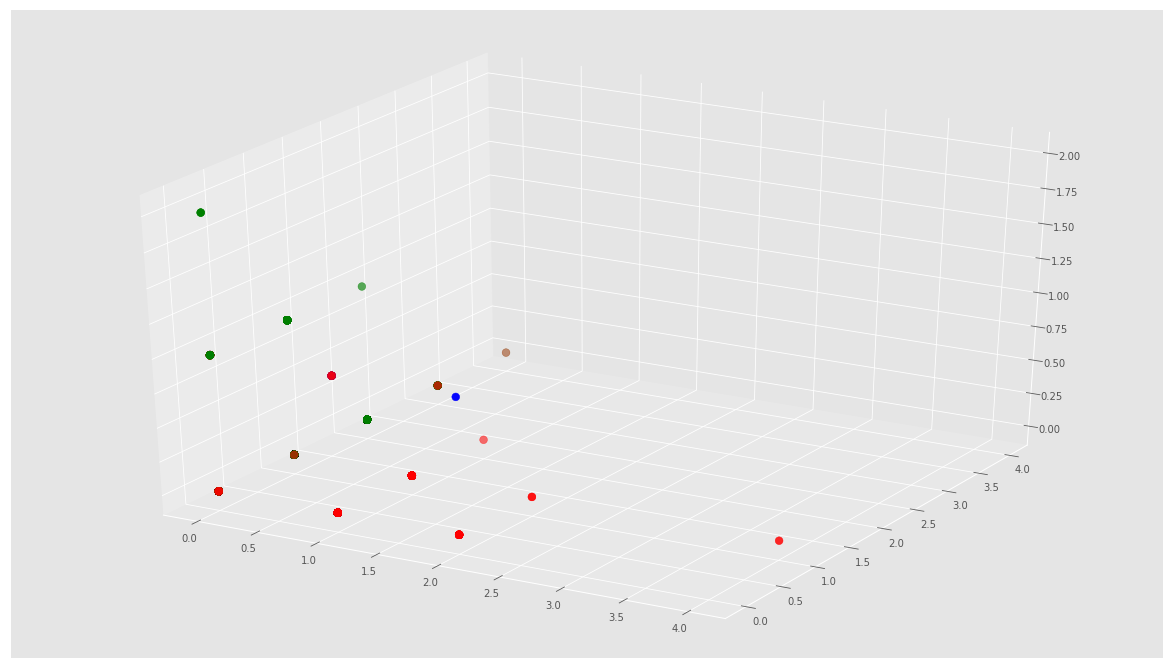

In [177]:
fig = plt.figure()
ax = Axes3D(fig)
clusters=['red','blue','green']
asignar=[]
for row in y:
    asignar.append(clusters[row])
ax.scatter(X[:, 0], X[:, 1],X[:,4], c=asignar,s=60)

## Implementación de Algoritmo Kmeans

In [24]:
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)  
centroids=kmeans.cluster_centers_
labels = kmeans.predict(X)
print(centroids)

[[ 1.45863223e-01  4.65327594e-01  1.06169297e-01  1.62601626e-02
   1.81731229e-02  1.81731229e-02  2.96508847e-02  6.69536107e-03
   1.17216643e+00  2.86944046e-03  3.20420851e-02]
 [ 1.09600680e-01  6.89039932e-01  4.18011895e-01  3.05862362e-02
   1.12999150e-01  1.36788445e-01  1.24893798e-01  4.58793543e-02
  -8.88178420e-15  2.03908241e-02  1.97111300e-01]
 [ 1.85528757e-03  2.05565863e+00  3.89610390e-02  8.32667268e-17
   1.85528757e-03  5.56586271e-03  9.27643785e-03  3.71057514e-03
   5.56586271e-02  1.05818132e-16  3.71057514e-03]]


In [158]:
d["label"] = labels
d.head(15)

,GRAVEDAD,PEATON,AUTOMOVIL,CAMPAERO,CAMIONETA,MICRO,BUSETA,BUS,CAMION,VOLQUETA,MOTO,BICICLETA,BARRIO,nombrecomuna,DIURNIO/NOCTURNO,NBARRIO,NCOMUNA,label
0,2,0,1,0,1,0,0,0,0,0,0,0,125,12,0,PORTON DEL TEJAR,Cabecera del Llano,1
1,2,0,1,0,0,0,0,0,0,0,0,0,134,6,0,RICAURTE,La Concordia,1
2,0,0,0,0,0,0,0,0,0,0,3,0,43,10,1,DIAMANTE II,Provenza,0
3,2,0,1,0,0,0,0,0,0,0,0,0,44,8,0,EL BUENO,Sur Occidente,1
4,0,0,0,0,0,0,0,0,0,0,2,0,40,12,1,CONUCOS,Cabecera del Llano,0
5,1,0,0,0,0,0,0,0,0,0,1,0,161,2,1,VILLA MERCEDES,Nororiental,0
6,2,0,1,1,0,0,0,0,0,0,0,0,126,8,1,PORVENIR,Sur Occidente,1
7,0,0,1,0,0,0,0,0,0,0,1,0,44,8,1,EL BUENO,Sur Occidente,0
8,0,1,1,0,0,0,0,0,0,0,0,0,66,2,0,JUVENTUD,Nororiental,1
9,2,0,0,0,0,0,0,0,1,0,0,0,31,3,0,CHAPINERO,San Francisco,1


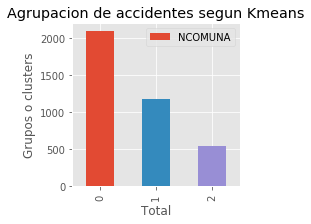

In [187]:
alpha = 0.7
plt.figure(figsize=(2,4))
d.groupby('label')['NCOMUNA'].count().plot(kind='bar',figsize=(3,3),legend='Reverse')
plt.title('Agrupacion de accidentes segun Kmeans')
plt.ylabel('Grupos o clusters')
plt.xlabel('Total')
plt.show()

In [186]:
 d[(d.label==d.GRAVEDAD)]

,GRAVEDAD,PEATON,AUTOMOVIL,CAMPAERO,CAMIONETA,MICRO,BUSETA,BUS,CAMION,VOLQUETA,MOTO,BICICLETA,BARRIO,nombrecomuna,DIURNIO/NOCTURNO,NBARRIO,NCOMUNA,label
2,0,0,0,0,0,0,0,0,0,0,3,0,43,10,1,DIAMANTE II,Provenza,0
4,0,0,0,0,0,0,0,0,0,0,2,0,40,12,1,CONUCOS,Cabecera del Llano,0
7,0,0,1,0,0,0,0,0,0,0,1,0,44,8,1,EL BUENO,Sur Occidente,0
10,0,0,1,0,0,0,0,0,0,0,1,0,39,3,0,COMUNEROS,San Francisco,0
11,0,0,0,0,0,0,0,0,0,0,2,0,10,13,0,ALVAREZ,Oriental,0
12,2,0,2,0,0,0,0,0,0,0,0,0,36,7,0,CIUDADELA REAL DE MINAS,La Ciudadela,2
15,2,0,2,0,0,0,0,0,0,0,0,0,71,6,0,LA CONCORDIA,La Concordia,2
18,0,0,1,0,0,0,0,0,0,0,1,0,34,7,0,CIUDAD BOLIVAR,La Ciudadela,0
19,2,0,2,0,0,0,0,0,0,0,0,0,128,10,0,PROVENZA,Provenza,2
20,2,0,2,0,0,0,0,0,0,0,0,0,12,13,0,ANTONIA SANTOS,Oriental,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fead99b10d0>,
      dtype=object)

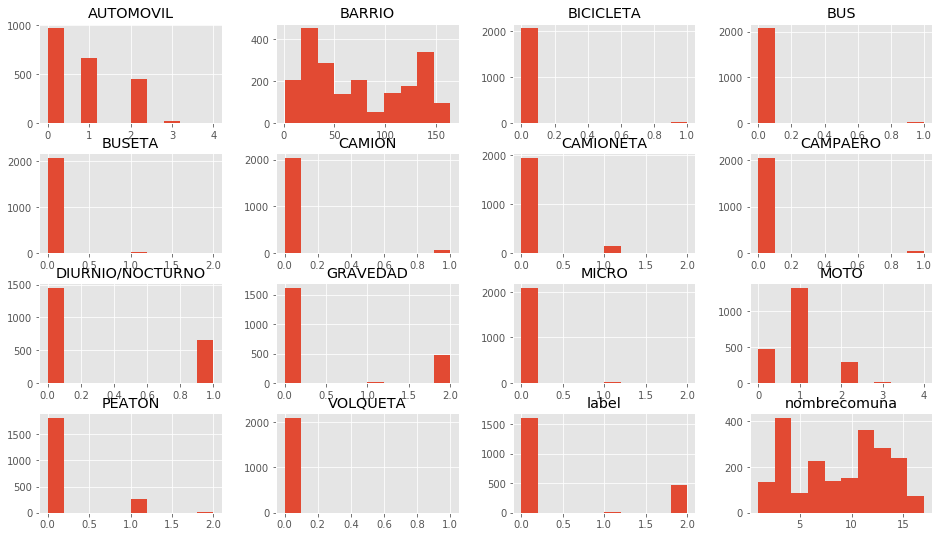

In [188]:
 d[(d.label==d.GRAVEDAD)].hist()

In [182]:
copy =  pd.DataFrame()
copy['nombrecomuna']=d['nombrecomuna'].values
copy['PEATON']=d['PEATON'].values
copy['GRAVEDAD']=d['GRAVEDAD'].values
copy['label'] = labels;

In [155]:
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['clusters']=clusters
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,clusters,cantidad
0,cluster0,2091
1,cluster1,1177
2,cluster2,539


## Análisis Grupo 0

In [164]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['GRAVEDAD']=[0,1,2]
diversidadGrupo['cantidad']=group_referrals.groupby('GRAVEDAD').size()
diversidadGrupo.head()

,GRAVEDAD,cantidad
0,0,1613
1,1,24
2,2,454


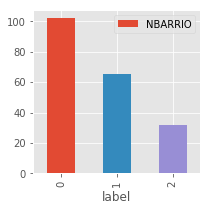

In [174]:
n=10 
r=d[(d.nombrecomuna>n-1) & (d.nombrecomuna<n+1)]
r.groupby('label')['NBARRIO'].count().plot(kind='bar',figsize=(3,3),legend='Reverse')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fead854ad50>,
      dtype=object)

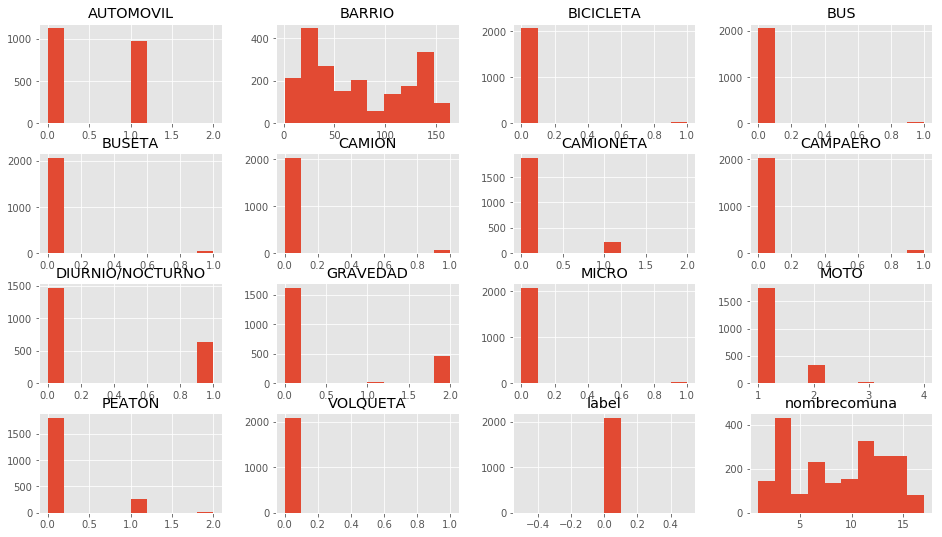

In [190]:
 d[(d.label==0)].hist()

## Análisis Grupo 1

In [40]:
group_referrer_index = copy['label'] ==1
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['GRAVEDAD']=[0,1,2]
diversidadGrupo['cantidad']=group_referrals.groupby('GRAVEDAD').size()
diversidadGrupo

,GRAVEDAD,cantidad
0,0,223
1,1,15
2,2,939


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fead89acf90>,
      dtype=object)

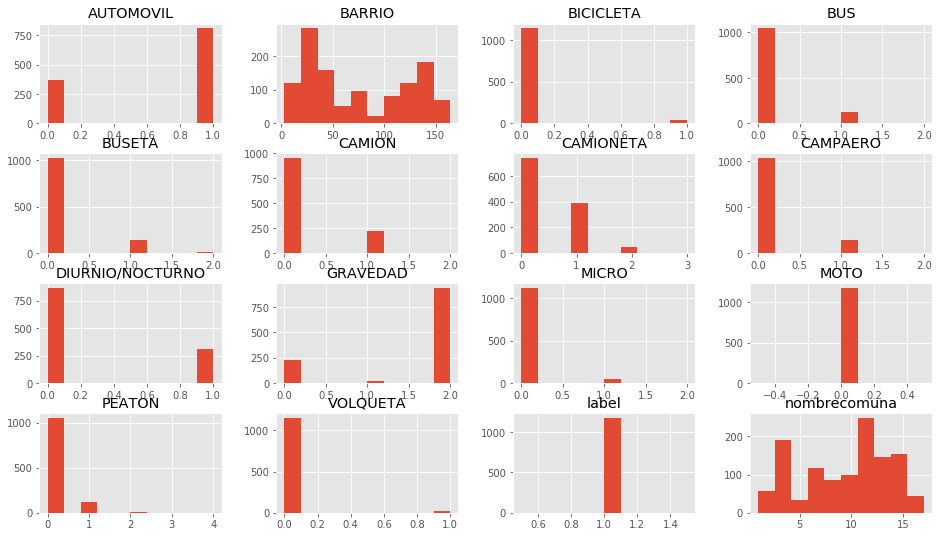

In [191]:
 d[(d.label==1)].hist()

## Análisis Grupo 2

In [41]:
group_referrer_index = copy['label'] ==2
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['GRAVEDAD']=[0,1,2]
diversidadGrupo['cantidad']=group_referrals.groupby('GRAVEDAD').size()
diversidadGrupo

,GRAVEDAD,cantidad
0,0,67.0
1,1,NaN
2,2,472.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fead29c0a90>,
      dtype=object)

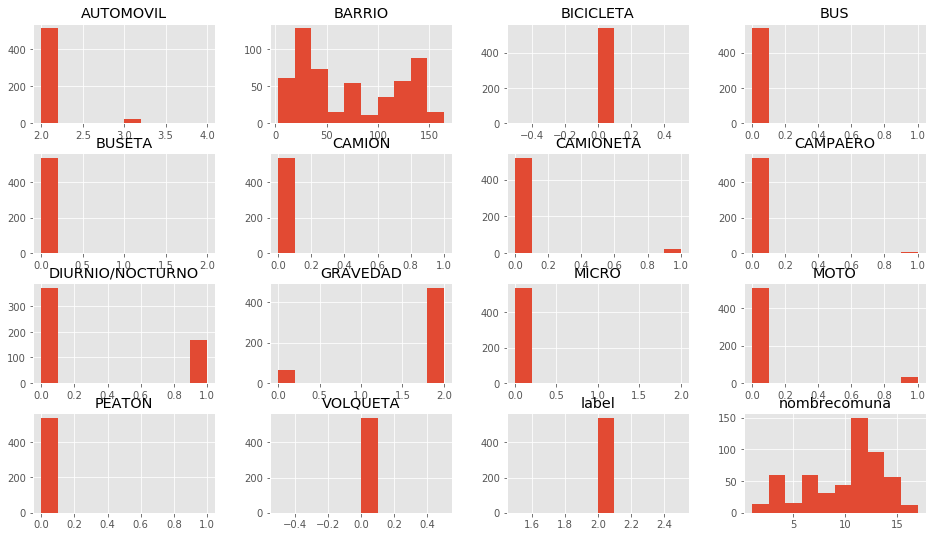

In [193]:
 d[(d.label==2)].hist()

In [32]:
#vemos el representante del grupo
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 5,  1, 12])

In [38]:
users=d['NCOMUNA'].values
for row in closest:
    print(users[row])

Nororiental
La Concordia
La Ciudadela


### Predecir a cual cluster pertenece un nuevo accidente

In [189]:
X_new = np.array([[1,1,1,1,1,1,1,1,1,1,1]]) 
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[1]
